In [ ]:
import os
import pandas
import csv
import glob

FILE_PATH = os.getcwd()
os.listdir()
xvg_files = glob.glob("*.xvg")
print (xvg_files)

In [15]:
#Delete  unnessasary lines(start with text) and after time >1000000
def delete_lines_xvg(files, last_line_number=1000000):
    for file in files:
        with open(file, 'r') as f:
            lines = f.readlines()

        filtered_lines = []
        for line in lines:
            parts = line.split()  # Split by whitespace
            if parts:  # Ensure it's not an empty line
                try:
                    first_value = float(parts[0])  # Convert the first column to a number
                    if first_value <= last_line_number:
                        filtered_lines.append(parts)  # Append entire row as a list
                except ValueError:
                    pass  # Skip non-numeric lines automatically

        # Save to a CSV file
        csv_filename = file.replace('.xvg', '.csv')  # Change the extension to .csv
        with open(csv_filename, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(filtered_lines)

        print(f"Filtered data saved as {csv_filename}")

In [16]:
delete_lines_xvg(xvg_files, last_line_number=1000000)

Filtered data saved as rmsdDMP_run1.csv
Filtered data saved as rmsdDNA_run1.csv
Filtered data saved as rmsdDNA_run3.csv
Filtered data saved as rmsdDEHP_run1.csv
Filtered data saved as rmsdDEP30_run1.csv
Filtered data saved as rmsdDEP30_run3.csv
Filtered data saved as rmsdDNA_run2.csv
Filtered data saved as rmsdDEHP_run3.csv
Filtered data saved as rmsdDMP_run3.csv
Filtered data saved as rmsdDEHP_run2.csv
Filtered data saved as rmsdDMP_run2.csv
Filtered data saved as rmsdDEP30_run2.csv


In [17]:
import pandas as pd

# Define compounds and runs
compounds = ('DMP', 'DEP', 'DEHP', 'DNA')
runs = [1, 2, 3]  # Assuming runs 1 to 3

# Dictionary to store DataFrames
dfs = {}

for compound in compounds:
    for run in runs:
        file_name = f"rmsd{compound}_run{run}.csv"  # Construct filename
        
        try:
            # Read CSV file
            df = pd.read_csv(file_name, sep=',', header=None, names=['time', 
                                                                     f'{compound}{run}'])
            
            # Store DataFrame in dictionary
            dfs[f'{compound}{run}'] = df
        
        except FileNotFoundError:
            print(f"Warning: {file_name} not found, skipping...")

# Merge DataFrames: Use the first column ('time') from any file, then merge all second columns
if dfs:
    # Take the first available DataFrame's 'time' column
    first_df = next(iter(dfs.values()))[['time']].copy()
    
    # Merge all second columns
    for key, df in dfs.items():
        first_df[key] = df.iloc[:, 1]  # Append the second column of each file

    # Save to CSV
    first_df.to_csv('merged_rmsd.csv', index=False)
    print("Merged data saved to 'merged_rmsd.csv'")

else:
    print("No valid files found. No CSV generated.")


Merged data saved to 'merged_rmsd.csv'


In [20]:
df = pandas.read_csv('merged_rmsd.csv')
df.columns

Index(['time', 'DMP1', 'DMP2', 'DMP3', 'DEP1', 'DEP2', 'DEP3', 'DEHP1',
       'DEHP2', 'DEHP3', 'DNA1', 'DNA2', 'DNA3'],
      dtype='object')

In [26]:
df2 = pandas.read_csv('merged_rmsd.csv')
compounds = ('DMP', 'DEP', 'DEHP', 'DNA')
for ii in compounds:
    df2[f'{ii}av'] = (df[f'{ii}1']+df[f'{ii}2']+df[f'{ii}3'])/3

df2= df2.drop(columns=['DMP1', 'DMP2', 'DMP3', 'DEP1', 'DEP2', 'DEP3', 'DEHP1',
       'DEHP2', 'DEHP3', 'DNA1', 'DNA2', 'DNA3'])
    
df2.to_csv('average_rmsd.csv', index=False)
print("Averaged RMSD data saved as 'average_rmsd.csv'.")


Averaged RMSD data saved as 'average_rmsd.csv'.


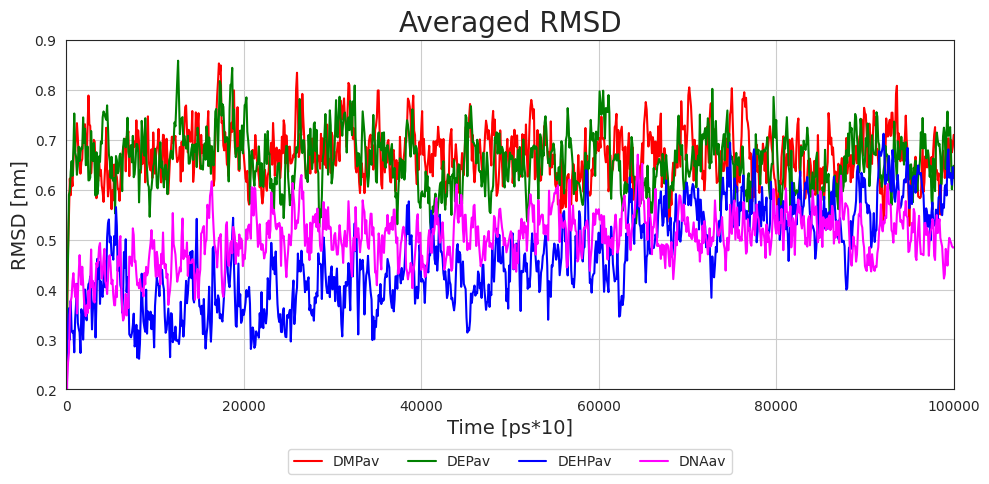

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('average_rmsd.csv')  

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Define color palette (extend if needed)
colors = ["red", "green", "blue", "magenta"]

# Set Seaborn style
sns.set_style("white")
sns.set_palette(colors)

# Plot all averaged RMSD values
for i, compound in enumerate(['DMPav', 'DEPav', 'DEHPav', 'DNAav']):
    sns.lineplot(x=df['time'], y=df[compound], label=compound, ax=ax, color=colors[i])

# Customize the plot
ax.set_title('Averaged RMSD', fontsize="20")
ax.set_xlabel('Time [ps*10]', fontsize="14" )
ax.set_ylabel('RMSD [nm]', fontsize="14")
ax.legend(title="Compounds", fontsize="14")  # Ensure legend appears
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
ax.grid(True)
ax.set_xlim(0, df['time'].max())  # Auto-scale x-axis
ax.set_ylim(0.2, 0.9)  # Adjust y-axis based on expected values
plt.tight_layout() 
# Save the plot to a file
plt.savefig('RMSD_av.png', bbox_inches='tight')
# Show the plot
plt.show()


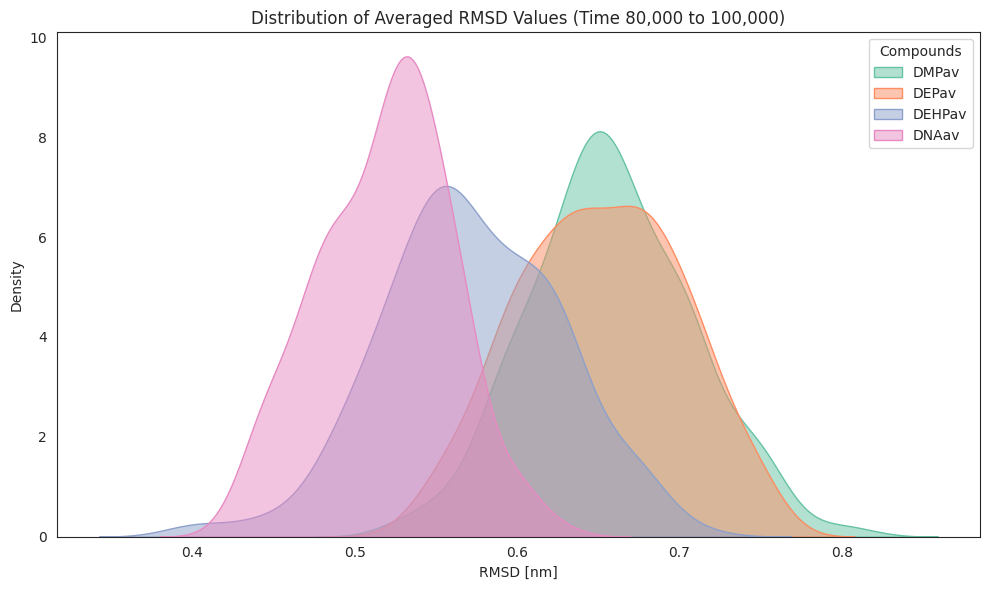

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('average_rmsd.csv')

# Filter the data to include only time from 80,000 to 100,000
filtered_df = df[(df['time'] >= 80000) & (df['time'] <= 100000)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set Seaborn style
sns.set_style("white")
sns.set_palette("Set2")

# Plot the distribution (KDE) of each compound's averaged RMSD for the filtered time range
for compound in ['DMPav', 'DEPav', 'DEHPav', 'DNAav']:
    sns.kdeplot(filtered_df[compound], label=compound, ax=ax, fill=True, alpha=0.5)

# Customize the plot
ax.set_title('Distribution of Averaged RMSD Values (Time 80,000 to 100,000)')
ax.set_xlabel('RMSD [nm]')
ax.set_ylabel('Density')
ax.legend(title="Compounds", loc='upper right')

plt.tight_layout() 
# Save the plot to a file
plt.savefig('RMSD_distr.png', bbox_inches='tight')
# Show the plot
plt.show()